In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('loan_dataset2.csv')

In [7]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,28,Male,Student,High School,Single,25000,590,Denied
2,51,Female,Manager,Bachelor's,Married,105000,780,Approved
3,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
4,24,Female,Nurse,Associate's,Single,48000,640,Denied


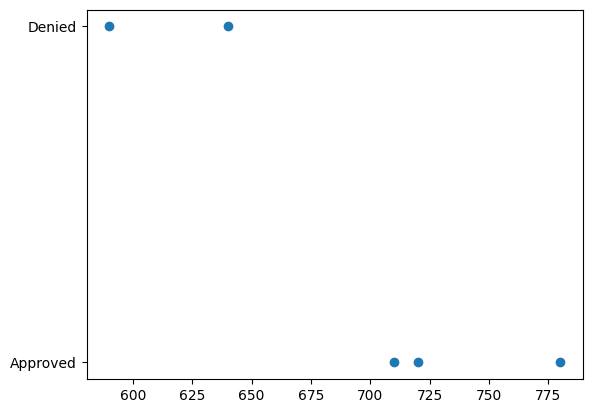

In [8]:
plt.scatter(df['credit_score'], df['loan_status'])

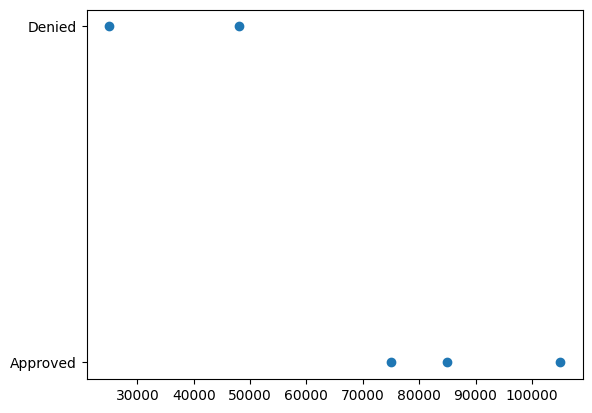

In [9]:
plt.scatter(df['income'], df['loan_status'])

In [10]:
# convert loan_status to binary
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == 'Denied' else 1)
# normalizing the data scince it has really big values
df['credit_score'] = (df['credit_score'] - df['credit_score'].min()) / (df['credit_score'].max() - df['credit_score'].min())
df['income'] = df['income'] / df['income'].max()
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,0.809524,0.684211,1
1,28,Male,Student,High School,Single,0.238095,0.000000,0
2,51,Female,Manager,Bachelor's,Married,1.000000,1.000000,1
3,36,Male,Accountant,Bachelor's,Married,0.714286,0.631579,1
4,24,Female,Nurse,Associate's,Single,0.457143,0.263158,0


In [11]:
# using the credit score and income as features
x = df[['credit_score', 'income']].values
y = df['loan_status'].values

In [9]:
# test train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
def sigmoid(x):
    # print(1 + np.exp(-x))
    return 1 / (1 + np.exp(-x))

def logistic_func(theta, x):
    # Logistic function for predictions
    # print(x)
    # print(np.dot(x, theta))
    print("sigmoid ( 1 / (1 + np.exp(-x))) :", sigmoid(np.dot(x, theta)))
    return sigmoid(np.dot(x, theta))

def cost_func(theta, x, y):
    # Logistic regression cost function
    m = x.shape[0]
    logistic = logistic_func(theta, x)
    cost = -(1/m) * np.sum(y * np.log(logistic + 1e-9) + (1 - y) * np.log(1 - logistic + 1e-9))
    print("cost: ", cost)
    return cost

def gradient(theta, x, y):
    m = x.shape[0]
    # print(r)
    return (1/m) *  np.dot(x.T,  logistic_func(theta, x) - y)

def fit(x, y, alpha=0.1, max_iter=200, eps=1e-6):
    # Train the logistic regression model
    x = np.insert(x, 0, 1, axis=1)  # Add bias term
    # theta = np.zeros(x.shape[1])
    theta = np.random.rand(x.shape[1]) * 0.01
    cost_history = []

    for _ in range(max_iter):
        grad = gradient(theta, x, y)
        theta -= alpha * grad
        # print(grad)
        new_cost = cost_func(theta, x, y)
        cost_history.append(new_cost)

    return theta, cost_history

def predict(x, theta):
    x = np.insert(x, 0, 1, axis=1)
    return logistic_func(theta, x)

sigmoid ( 1 / (1 + np.exp(-x))) : [0.5040705  0.50227946 0.50478907 0.5038571  0.50296725]
sigmoid ( 1 / (1 + np.exp(-x))) : [0.97874479 0.8025802  0.99197689 0.97208271 0.91171046]
cost:  0.8214821334384015
[0.97178649 2.03659353 1.80899397]


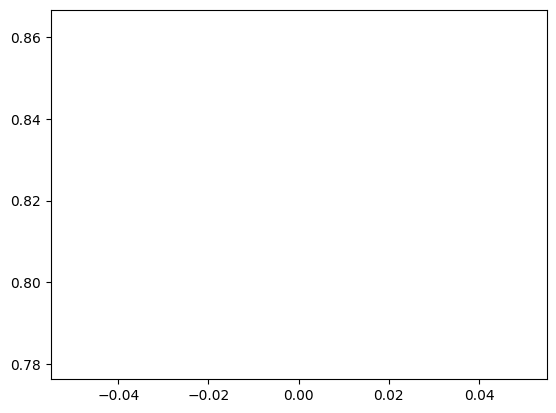

In [23]:
theta, history = fit(x, y, alpha=10, max_iter=1)

print(theta)

plt.plot(history)

In [13]:
# predict
y_pred = predict(x_test, theta)

# convert to binary
y_pred = np.round(y_pred)
print(y_pred)

# accuracy
accuracy = np.mean(y_pred == y_test)
print(accuracy)

[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
1.0
